# Introduction

The goal of this analysis is to look into LEGO data and answer a couple of questions:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/)

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
colors = pd.read_csv('colors.csv')

In [4]:
colors

id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]

In [5]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

Transparent colors check:

In [6]:
colors.groupby('is_trans').count()

id  name  rgb
is_trans                
f         107   107  107
t          28    28   28

In [7]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Themes are groups of thematically connected sets.

<img src="https://i.imgur.com/aKcwkSx.png">

Set is a singular LEGO product.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [8]:
sets = pd.read_csv('sets.csv')

In [12]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

In [9]:
sets.head()

set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

In [10]:
sets.tail()

set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413

In which year were the first LEGO sets released and what were these sets called?

In [20]:
sets.loc[sets['year'] == min(sets['year'])]

set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12

Top 5 LEGO sets with the most number of parts. 

In [22]:
sets.sort_values(by=['num_parts'], ascending=False).head()

set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922

Number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [53]:
sets_by_year = sets.groupby(by=['year'])['set_num'].count()

In [54]:
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

In [61]:
print('Year 1955: {}\nYear 2019: {}'.format(sets_by_year.loc[[1955]].values[0], sets_by_year.loc[[2019]].values[0]))

Year 1955: 28
Year 2019: 840


Number of LEGO releases on a line chart using Matplotlib. 

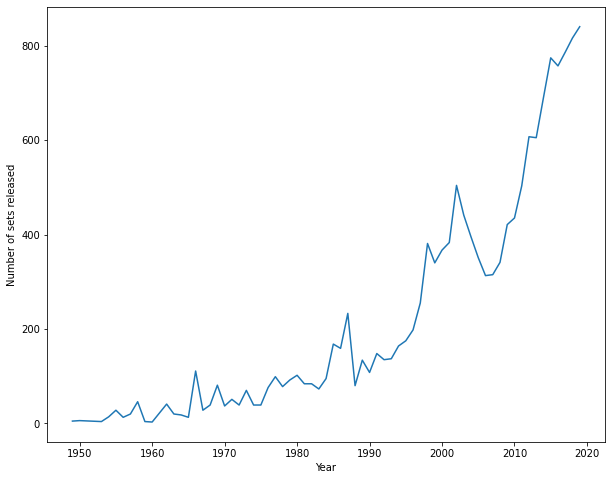

In [60]:
plt.figure(figsize=[10, 8])

plt.plot(sets_by_year.index[:-2], sets_by_year.values[:-2])

plt.xlabel('Year')
plt.ylabel('Number of sets released')

plt.show()

Number of different themes shipped by year:

In [73]:
unique_themes = sets.groupby(by=['year']).theme_id.nunique()

In [120]:
unique_themes

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64

Number of different themes by year on a line plot.

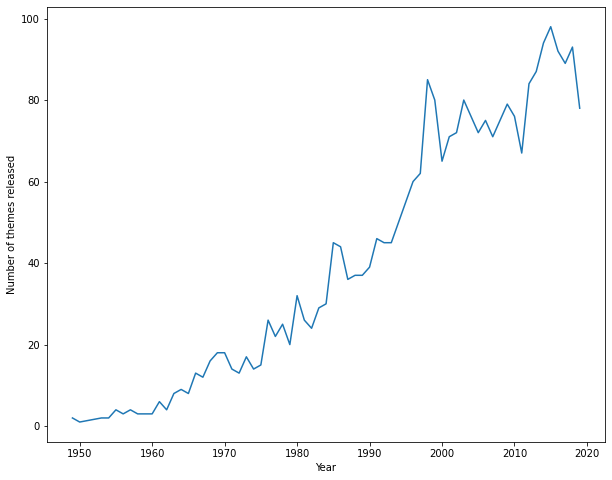

In [75]:
plt.figure(figsize=[10, 8])

plt.plot(unique_themes[:-2].index, unique_themes[:-2].values)

plt.xlabel('Year')
plt.ylabel('Number of themes released')

plt.show()

### Line Charts with Two Seperate Axes

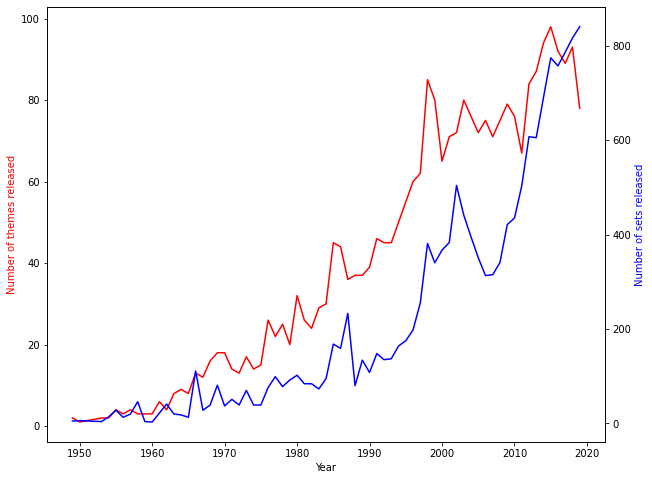

In [78]:
plt.figure(figsize=[10, 8])

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(unique_themes[:-2].index, unique_themes[:-2].values, color='red')
ax2.plot(sets_by_year.index[:-2], sets_by_year.values[:-2], color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of themes released', color='red')
ax2.set_ylabel('Number of sets released', color='blue')

plt.show()

Average number of parts per set

In [85]:
avg_n_of_parts = sets.groupby('year')['num_parts'].agg('sum')/ sets.groupby('year')['num_parts'].count()

In [88]:
avg_n_of_parts

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
           ...    
2017    221.840967
2018    213.618873
2019    207.510714
2020    259.732938
2021      0.000000
Name: num_parts, Length: 71, dtype: float64

In [86]:
print('Year 1954: {}\nYear 2017: {}'.format(avg_n_of_parts.loc[[1954]].values[0], avg_n_of_parts.loc[[2017]].values[0]))

Year 1954: 12.357142857142858
Year 2017: 221.8409669211196


### Scatter Plot in Matplotlib

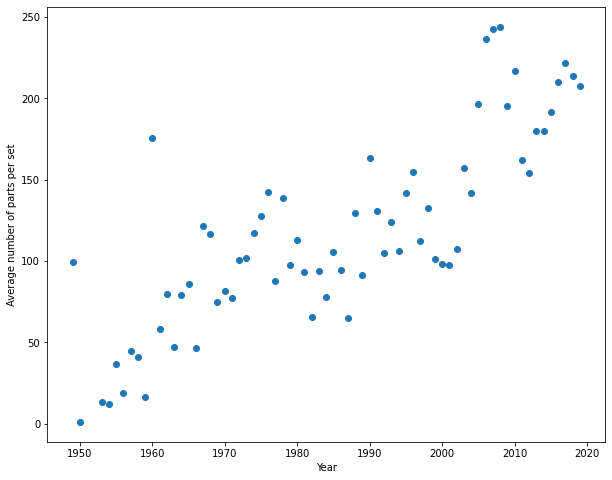

In [87]:
plt.figure(figsize=[10, 8])

plt.scatter(avg_n_of_parts[:-2].index, avg_n_of_parts[:-2].values)

plt.xlabel('Year')
plt.ylabel('Average number of parts per set')

plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [95]:
sets.groupby('theme_id')['set_num'].count().sort_values(ascending=False)

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
212      1
210      1
200      1
509      1
368      1
Name: set_num, Length: 571, dtype: int64

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

In [96]:
themes = pd.read_csv('themes.csv')

In [98]:
themes.head()

id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

In [99]:
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [102]:
themes[themes['name'].str.contains('Star Wars')]

id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0

In [105]:
found_ids = themes[themes['name'].str.contains('Star Wars')]['id'].values

In [106]:
sets[sets['theme_id'].isin(found_ids)]

set_num                                               name  year  \
850        11912-1                Star Wars: Build Your Own Adventure  2016   
855        11920-1  Parts for Star Wars Build Your Own Adventure: ...  2019   
1717       20006-1                            Clone Turbo Tank - Mini  2008   
1728       20007-1                     Republic Attack Cruiser - Mini  2009   
1738       20009-1                                AT-TE Walker - Mini  2009   
...            ...                                                ...   ...   
15686         VP-4            Star Wars Co-Pack of 7101 7111 and 7171  2000   
15689         VP-8                 Star Wars Co-Pack of 7130 and 7150  2000   
15707      XWING-1                                Mini X-Wing Fighter  2019   
15708      XWING-2                                  X-Wing Trench Run  2019   
15709  YODACHRON-1                    Yoda Chronicles Promotional Set  2013   

       theme_id  num_parts  
850         158         73  
855         158         70  
1717        158         64  
1728        158         84  
1738        158         94  
...         ...        ...  
15686       158          0  
15689       158          0  
15707       158         60  
15708       158         52  
15709       158        413  

[776 rows x 5 columns]

### Merging (i.e., Combining) DataFrames based on a Key


In [116]:
themes.rename(columns={'id': 'theme_id', 'name': 'theme_name'}, inplace=True)

In [118]:
merged = sets.merge(themes, how='inner', on='theme_id')

In [119]:
merged

set_num                                               name  year  \
0            001-1                                              Gears  1965   
1            002-1                     4.5V Samsonite Gears Motor Set  1965   
2           1030-1                     TECHNIC I: Simple Machines Set  1985   
3           1038-1                                 ERBIE the Robo-Car  1985   
4           1039-1                               Manual Control Set 1  1986   
...            ...                                                ...   ...   
15705      K6762-1                                        Western Kit  2002   
15706     llca27-1  Legoland Pirate with Parrot (Legoland California)  2006   
15707     LLCA29-1  Pirate Treasure Chest Bank (LLCA Ambassador Pa...  2006   
15708     LLCA30-1  Pirate Ship Diorama (LLCA Ambassador Pass Excl...  2006   
15709  WEETABIX1-1                                    Weetabix Castle  1970   

       theme_id  num_parts theme_name  parent_id  
0             1         43    Technic        NaN  
1             1          3    Technic        NaN  
2             1        191    Technic        NaN  
3             1        120    Technic        NaN  
4             1         39    Technic        NaN  
...         ...        ...        ...        ...  
15705       475          0    Western        NaN  
15706       430         70    Pirates      425.0  
15707       430        215    Pirates      425.0  
15708       430        127    Pirates      425.0  
15709       414        471     Castle      411.0  

[15710 rows x 7 columns]